# 1JHC Has to Segments - Split them manually within Folds

In [1]:
import pandas as pd
import matplotlib.pylab as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import GroupKFold

In [2]:
jhc_train = pd.read_parquet('../data/FE012-train-1JHC.parquet')
jhc_test = pd.read_parquet('../data/FE012-test-1JHC.parquet')

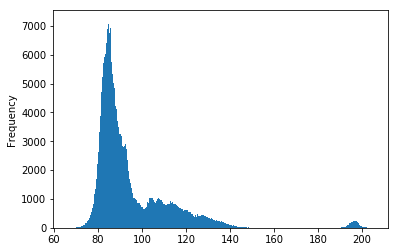

In [3]:
jhc_train['scalar_coupling_constant'].plot(kind='hist', bins=1000)

In [4]:
mol_group = [x for x in jhc_train['molecule_name']]

In [5]:
FEATURES = [
            #'id',
            # 'molecule_name',
            # 'atom_index_0',
            # 'atom_index_1',
            # 'type',
            # 'scalar_coupling_constant',
             # 'atom0_atomic_mass',
             # 'atom0_atomic_number',
             # 'exact_mass_x',
             # 'atom0_valence',
             # 'atom0_spin_multiplicity',
             # 'atom1_atomic_mass',
             # 'atom1_atomic_number',
             # 'exact_mass_y',
             'atom1_valence',
             'atom1_spin_multiplicity',
             'left_middle_average_angle',
             'right_middle_average_angle',
             'distance',
             'is_bond',
            # 'closest_to_0',
            # '2nd_closest_to_0',
            # '3rd_closest_to_0',
            # '4th_closest_to_0',
            # '5th_closest_to_0',
            # '6th_closest_to_0',
            # '7th_closest_to_0',
            # '8th_closest_to_0',
            # '9th_closest_to_0',
            # '10th_closest_to_0',
            # 'closest_to_1',
            # '2nd_closest_to_1',
            # '3rd_closest_to_1',
            # '4th_closest_to_1',
            # '5th_closest_to_1',
            # '6th_closest_to_1',
            # '7th_closest_to_1',
            # '8th_closest_to_1',
            # '9th_closest_to_1',
            # '10th_closest_to_1',
             # 'is_closest_pair',
             'distance_closest_to_0',
             # 'is_bond_closest_to_0',
             'distance_2nd_closest_to_0',
             # 'is_bond_2nd_closest_to_0',
             'distance_3rd_closest_to_0',
             # 'is_bond_3rd_closest_to_0',
             'distance_4th_closest_to_0',
             # 'is_bond_4th_closest_to_0',
             'distance_5th_closest_to_0',
             # 'is_bond_5th_closest_to_0',
             'distance_6th_closest_to_0',
             # 'is_bond_6th_closest_to_0',
             'distance_7th_closest_to_0',
             # 'is_bond_7th_closest_to_0',
             'distance_8th_closest_to_0',
             # 'is_bond_8th_closest_to_0',
             'distance_9th_closest_to_0',
             # 'is_bond_9th_closest_to_0',
             'distance_10th_closest_to_0',
             # 'is_bond_10th_closest_to_0',
             'distance_closest_to_1',
             # 'is_bond_closest_to_1',
             'distance_2nd_closest_to_1',
             # 'is_bond_2nd_closest_to_1',
             'distance_3rd_closest_to_1',
             'is_bond_3rd_closest_to_1',
             'distance_4th_closest_to_1',
             # 'is_bond_4th_closest_to_1',
             'distance_5th_closest_to_1',
             # 'is_bond_5th_closest_to_1',
             'distance_6th_closest_to_1',
             # 'is_bond_6th_closest_to_1',
             'distance_7th_closest_to_1',
             # 'is_bond_7th_closest_to_1',
             'distance_8th_closest_to_1',
             # 'is_bond_8th_closest_to_1',
             'distance_9th_closest_to_1',
             # 'is_bond_9th_closest_to_1',
             'distance_10th_closest_to_1',
             # 'is_bond_10th_closest_to_1',
             'closest_to_0_atomic_mass',
             # 'closest_to_0_atomic_number',
             # 'closest_to_0_exact_mass',
             'closest_to_0_valence',
             'closest_to_0_spin_multiplicity',
             '2nd_closest_to_0_atomic_mass',
             # '2nd_closest_to_0_atomic_number',
             # '2nd_closest_to_0_exact_mass',
             '2nd_closest_to_0_valence',
             '2nd_closest_to_0_spin_multiplicity',
             '3rd_closest_to_0_atomic_mass',
             # '3rd_closest_to_0_atomic_number',
             # '3rd_closest_to_0_exact_mass',
             '3rd_closest_to_0_valence',
             '3rd_closest_to_0_spin_multiplicity',
             '4th_closest_to_0_atomic_mass',
             # '4th_closest_to_0_atomic_number',
             # '4th_closest_to_0_exact_mass',
             '4th_closest_to_0_valence',
             '4th_closest_to_0_spin_multiplicity',
             '5th_closest_to_0_atomic_mass',
             # '5th_closest_to_0_atomic_number',
             # '5th_closest_to_0_exact_mass',
             '5th_closest_to_0_valence',
             '5th_closest_to_0_spin_multiplicity',
             '6th_closest_to_0_atomic_mass',
             # '6th_closest_to_0_atomic_number',
             # '6th_closest_to_0_exact_mass',
             '6th_closest_to_0_valence',
             '6th_closest_to_0_spin_multiplicity',
             '7th_closest_to_0_atomic_mass',
             # '7th_closest_to_0_atomic_number',
             # '7th_closest_to_0_exact_mass',
             '7th_closest_to_0_valence',
             '7th_closest_to_0_spin_multiplicity',
             '8th_closest_to_0_atomic_mass',
             # '8th_closest_to_0_atomic_number',
             # '8th_closest_to_0_exact_mass',
             '8th_closest_to_0_valence',
             '8th_closest_to_0_spin_multiplicity',
             '9th_closest_to_0_atomic_mass',
             # '9th_closest_to_0_atomic_number',
             # '9th_closest_to_0_exact_mass',
             '9th_closest_to_0_valence',
             '9th_closest_to_0_spin_multiplicity',
             '10th_closest_to_0_atomic_mass',
             # '10th_closest_to_0_atomic_number',
             # '10th_closest_to_0_exact_mass',
             '10th_closest_to_0_valence',
             '10th_closest_to_0_spin_multiplicity',
             'closest_to_1_atomic_mass',
             # 'closest_to_1_atomic_number',
             # 'closest_to_1_exact_mass',
             'closest_to_1_valence',
             'closest_to_1_spin_multiplicity',
             '2nd_closest_to_1_atomic_mass',
             # '2nd_closest_to_1_atomic_number',
             # '2nd_closest_to_1_exact_mass',
             '2nd_closest_to_1_valence',
             '2nd_closest_to_1_spin_multiplicity',
             '3rd_closest_to_1_atomic_mass',
             # '3rd_closest_to_1_atomic_number',
             # '3rd_closest_to_1_exact_mass',
             '3rd_closest_to_1_valence',
             '3rd_closest_to_1_spin_multiplicity',
             '4th_closest_to_1_atomic_mass',
             # '4th_closest_to_1_atomic_number',
             # '4th_closest_to_1_exact_mass',
             '4th_closest_to_1_valence',
             '4th_closest_to_1_spin_multiplicity',
             '5th_closest_to_1_atomic_mass',
             # '5th_closest_to_1_atomic_number',
             # '5th_closest_to_1_exact_mass',
             '5th_closest_to_1_valence',
             '5th_closest_to_1_spin_multiplicity',
             '6th_closest_to_1_atomic_mass',
             # '6th_closest_to_1_atomic_number',
             # '6th_closest_to_1_exact_mass',
             '6th_closest_to_1_valence',
             '6th_closest_to_1_spin_multiplicity',
             '7th_closest_to_1_atomic_mass',
             # '7th_closest_to_1_atomic_number',
             # '7th_closest_to_1_exact_mass',
             '7th_closest_to_1_valence',
             '7th_closest_to_1_spin_multiplicity',
             '8th_closest_to_1_atomic_mass',
             # '8th_closest_to_1_atomic_number',
             # '8th_closest_to_1_exact_mass',
             '8th_closest_to_1_valence',
             '8th_closest_to_1_spin_multiplicity',
             '9th_closest_to_1_atomic_mass',
             # '9th_closest_to_1_atomic_number',
             # '9th_closest_to_1_exact_mass',
             '9th_closest_to_1_valence',
             '9th_closest_to_1_spin_multiplicity',
             '10th_closest_to_1_atomic_mass',
             # '10th_closest_to_1_atomic_number',
             # '10th_closest_to_1_exact_mass',
             '10th_closest_to_1_valence',
             '10th_closest_to_1_spin_multiplicity',
             'tor_ang_2leftleft_mean',
             'tor_ang_2leftleft_min',
             'tor_ang_2leftleft_max',
             'tor_ang_2leftleft_count',
             'tor_ang_2leftright_mean',
             'tor_ang_2leftright_min',
             'tor_ang_2leftright_max',
             'tor_ang_2leftright_count',
             'mol_wt',
             'num_atoms',
             'num_bonds',
             # '11th_closest_to_0',
             # '12th_closest_to_0',
             # '13th_closest_to_0',
             # '14th_closest_to_0',
             # '15th_closest_to_0',
             # '16th_closest_to_0',
             # '17th_closest_to_0',
             # '18th_closest_to_0',
             # '19th_closest_to_0',
             # '20th_closest_to_0',
             # '21st_closest_to_0',
             # '22nd_closest_to_0',
             # '23rd_closest_to_0',
             # '24th_closest_to_0',
             # '25th_closest_to_0',
             # '26th_closest_to_0',
             # '27th_closest_to_0',
             # '28th_closest_to_0',
             # '11th_closest_to_1',
             # '12th_closest_to_1',
             # '13th_closest_to_1',
             # '14th_closest_to_1',
             # '15th_closest_to_1',
             # '16th_closest_to_1',
             # '17th_closest_to_1',
             # '18th_closest_to_1',
             # '19th_closest_to_1',
             # '20th_closest_to_1',
             # '21st_closest_to_1',
             # '22nd_closest_to_1',
             # '23rd_closest_to_1',
             # '24th_closest_to_1',
             # '25th_closest_to_1',
             # '26th_closest_to_1',
             # '27th_closest_to_1',
             # '28th_closest_to_1',
             'distance_12th_closest_to_0',
             # 'is_bond_12th_closest_to_0',
             'distance_13th_closest_to_0',
             # 'is_bond_13th_closest_to_0',
             'distance_14th_closest_to_0',
             # 'is_bond_14th_closest_to_0',
             'distance_15th_closest_to_0',
             # 'is_bond_15th_closest_to_0',
             'distance_16th_closest_to_0',
             # 'is_bond_16th_closest_to_0',
             'distance_17th_closest_to_0',
             # 'is_bond_17th_closest_to_0',
             'distance_18th_closest_to_0',
             # 'is_bond_18th_closest_to_0',
             'distance_19th_closest_to_0',
             # 'is_bond_19th_closest_to_0',
             'distance_20th_closest_to_0',
             # 'is_bond_20th_closest_to_0',
             'distance_21st_closest_to_0',
             # 'is_bond_21st_closest_to_0',
             'distance_22nd_closest_to_0',
             # 'is_bond_22nd_closest_to_0',
             'distance_23rd_closest_to_0',
             # 'is_bond_23rd_closest_to_0',
             'distance_24th_closest_to_0',
             # 'is_bond_24th_closest_to_0',
             'distance_25th_closest_to_0',
             # 'is_bond_25th_closest_to_0',
             'distance_26th_closest_to_0',
             # 'is_bond_26th_closest_to_0',
             'distance_27th_closest_to_0',
             # 'is_bond_27th_closest_to_0',
             'distance_28th_closest_to_0',
             # 'is_bond_28th_closest_to_0',
             'distance_12th_closest_to_1',
             # 'is_bond_12th_closest_to_1',
             'distance_13th_closest_to_1',
             # 'is_bond_13th_closest_to_1',
             'distance_14th_closest_to_1',
             # 'is_bond_14th_closest_to_1',
             'distance_15th_closest_to_1',
             # 'is_bond_15th_closest_to_1',
             'distance_16th_closest_to_1',
             # 'is_bond_16th_closest_to_1',
             'distance_17th_closest_to_1',
             # 'is_bond_17th_closest_to_1',
             'distance_18th_closest_to_1',
             # 'is_bond_18th_closest_to_1',
             'distance_19th_closest_to_1',
             # 'is_bond_19th_closest_to_1',
             'distance_20th_closest_to_1',
             # 'is_bond_20th_closest_to_1',
             'distance_21st_closest_to_1',
             # 'is_bond_21st_closest_to_1',
             'distance_22nd_closest_to_1',
             # 'is_bond_22nd_closest_to_1',
             'distance_23rd_closest_to_1',
             # 'is_bond_23rd_closest_to_1',
             'distance_24th_closest_to_1',
             # 'is_bond_24th_closest_to_1',
             'distance_25th_closest_to_1',
             # 'is_bond_25th_closest_to_1',
             'distance_26th_closest_to_1',
             # 'is_bond_26th_closest_to_1',
             'distance_27th_closest_to_1',
             # 'is_bond_27th_closest_to_1',
             'distance_28th_closest_to_1',
             # 'is_bond_28th_closest_to_1',
             '11th_closest_to_0_atomic_mass',
             # '11th_closest_to_0_atomic_number',
             # '11th_closest_to_0_exact_mass',
             '11th_closest_to_0_valence',
             '11th_closest_to_0_spin_multiplicity',
             '12th_closest_to_0_atomic_mass',
             # '12th_closest_to_0_atomic_number',
             # '12th_closest_to_0_exact_mass',
             '12th_closest_to_0_valence',
             '12th_closest_to_0_spin_multiplicity',
             '13th_closest_to_0_atomic_mass',
             # '13th_closest_to_0_atomic_number',
             # '13th_closest_to_0_exact_mass',
             '13th_closest_to_0_valence',
             '13th_closest_to_0_spin_multiplicity',
             '14th_closest_to_0_atomic_mass',
             # '14th_closest_to_0_atomic_number',
             # '14th_closest_to_0_exact_mass',
             '14th_closest_to_0_valence',
             '14th_closest_to_0_spin_multiplicity',
             '15th_closest_to_0_atomic_mass',
             # '15th_closest_to_0_atomic_number',
             # '15th_closest_to_0_exact_mass',
             '15th_closest_to_0_valence',
             '15th_closest_to_0_spin_multiplicity',
             '16th_closest_to_0_atomic_mass',
             # '16th_closest_to_0_atomic_number',
             # '16th_closest_to_0_exact_mass',
             '16th_closest_to_0_valence',
             '16th_closest_to_0_spin_multiplicity',
             '17th_closest_to_0_atomic_mass',
             # '17th_closest_to_0_atomic_number',
             # '17th_closest_to_0_exact_mass',
             '17th_closest_to_0_valence',
             '17th_closest_to_0_spin_multiplicity',
             '18th_closest_to_0_atomic_mass',
             # '18th_closest_to_0_atomic_number',
             # '18th_closest_to_0_exact_mass',
             '18th_closest_to_0_valence',
             '18th_closest_to_0_spin_multiplicity',
             '19th_closest_to_0_atomic_mass',
             # '19th_closest_to_0_atomic_number',
             # '19th_closest_to_0_exact_mass',
             '19th_closest_to_0_valence',
             '19th_closest_to_0_spin_multiplicity',
             '20th_closest_to_0_atomic_mass',
             # '20th_closest_to_0_atomic_number',
             # '20th_closest_to_0_exact_mass',
             '20th_closest_to_0_valence',
             '20th_closest_to_0_spin_multiplicity',
             '21st_closest_to_0_atomic_mass',
             # '21st_closest_to_0_atomic_number',
             # '21st_closest_to_0_exact_mass',
             '21st_closest_to_0_valence',
             '21st_closest_to_0_spin_multiplicity',
             '22nd_closest_to_0_atomic_mass',
             # '22nd_closest_to_0_atomic_number',
             # '22nd_closest_to_0_exact_mass',
             '22nd_closest_to_0_valence',
             '22nd_closest_to_0_spin_multiplicity',
             '23rd_closest_to_0_atomic_mass',
             # '23rd_closest_to_0_atomic_number',
             # '23rd_closest_to_0_exact_mass',
             '23rd_closest_to_0_valence',
             '23rd_closest_to_0_spin_multiplicity',
             '24th_closest_to_0_atomic_mass',
             # '24th_closest_to_0_atomic_number',
             # '24th_closest_to_0_exact_mass',
             '24th_closest_to_0_valence',
             '24th_closest_to_0_spin_multiplicity',
             '25th_closest_to_0_atomic_mass',
             # '25th_closest_to_0_atomic_number',
             # '25th_closest_to_0_exact_mass',
             '25th_closest_to_0_valence',
             '25th_closest_to_0_spin_multiplicity',
             '26th_closest_to_0_atomic_mass',
             # '26th_closest_to_0_atomic_number',
             # '26th_closest_to_0_exact_mass',
             '26th_closest_to_0_valence',
             '26th_closest_to_0_spin_multiplicity',
             '27th_closest_to_0_atomic_mass',
             # '27th_closest_to_0_atomic_number',
             # '27th_closest_to_0_exact_mass',
             '27th_closest_to_0_valence',
             '27th_closest_to_0_spin_multiplicity',
             '28th_closest_to_0_atomic_mass',
             # '28th_closest_to_0_atomic_number',
             # '28th_closest_to_0_exact_mass',
             '28th_closest_to_0_valence',
             '28th_closest_to_0_spin_multiplicity',
             '11th_closest_to_1_atomic_mass',
             # '11th_closest_to_1_atomic_number',
             # '11th_closest_to_1_exact_mass',
             '11th_closest_to_1_valence',
             '11th_closest_to_1_spin_multiplicity',
             '12th_closest_to_1_atomic_mass',
             # '12th_closest_to_1_atomic_number',
             # '12th_closest_to_1_exact_mass',
             '12th_closest_to_1_valence',
             '12th_closest_to_1_spin_multiplicity',
             '13th_closest_to_1_atomic_mass',
             # '13th_closest_to_1_atomic_number',
             # '13th_closest_to_1_exact_mass',
             '13th_closest_to_1_valence',
             '13th_closest_to_1_spin_multiplicity',
             '14th_closest_to_1_atomic_mass',
             # '14th_closest_to_1_atomic_number',
             # '14th_closest_to_1_exact_mass',
             '14th_closest_to_1_valence',
             '14th_closest_to_1_spin_multiplicity',
             '15th_closest_to_1_atomic_mass',
             # '15th_closest_to_1_atomic_number',
             # '15th_closest_to_1_exact_mass',
             '15th_closest_to_1_valence',
             '15th_closest_to_1_spin_multiplicity',
             '16th_closest_to_1_atomic_mass',
             # '16th_closest_to_1_atomic_number',
             # '16th_closest_to_1_exact_mass',
             '16th_closest_to_1_valence',
             # '16th_closest_to_1_spin_multiplicity',
             '17th_closest_to_1_atomic_mass',
             # '17th_closest_to_1_atomic_number',
             # '17th_closest_to_1_exact_mass',
             '17th_closest_to_1_valence',
             '17th_closest_to_1_spin_multiplicity',
             '18th_closest_to_1_atomic_mass',
             # '18th_closest_to_1_atomic_number',
             # '18th_closest_to_1_exact_mass',
             '18th_closest_to_1_valence',
             '18th_closest_to_1_spin_multiplicity',
             '19th_closest_to_1_atomic_mass',
             # '19th_closest_to_1_atomic_number',
             # '19th_closest_to_1_exact_mass',
             '19th_closest_to_1_valence',
             '19th_closest_to_1_spin_multiplicity',
             '20th_closest_to_1_atomic_mass',
             # '20th_closest_to_1_atomic_number',
             # '20th_closest_to_1_exact_mass',
             '20th_closest_to_1_valence',
             '20th_closest_to_1_spin_multiplicity',
             '21st_closest_to_1_atomic_mass',
             # '21st_closest_to_1_atomic_number',
             # '21st_closest_to_1_exact_mass',
             '21st_closest_to_1_valence',
             '21st_closest_to_1_spin_multiplicity',
             '22nd_closest_to_1_atomic_mass',
             # '22nd_closest_to_1_atomic_number',
             # '22nd_closest_to_1_exact_mass',
             '22nd_closest_to_1_valence',
             '22nd_closest_to_1_spin_multiplicity',
             '23rd_closest_to_1_atomic_mass',
             # '23rd_closest_to_1_atomic_number',
             # '23rd_closest_to_1_exact_mass',
             '23rd_closest_to_1_valence',
             '23rd_closest_to_1_spin_multiplicity',
             '24th_closest_to_1_atomic_mass',
             # '24th_closest_to_1_atomic_number',
             # '24th_closest_to_1_exact_mass',
             '24th_closest_to_1_valence',
             '24th_closest_to_1_spin_multiplicity',
             '25th_closest_to_1_atomic_mass',
             # '25th_closest_to_1_atomic_number',
             # '25th_closest_to_1_exact_mass',
             '25th_closest_to_1_valence',
             '25th_closest_to_1_spin_multiplicity',
             '26th_closest_to_1_atomic_mass',
             # '26th_closest_to_1_atomic_number',
             # '26th_closest_to_1_exact_mass',
             '26th_closest_to_1_valence',
             '26th_closest_to_1_spin_multiplicity',
             '27th_closest_to_1_atomic_mass',
             # '27th_closest_to_1_atomic_number',
             # '27th_closest_to_1_exact_mass',
             '27th_closest_to_1_valence',
             '27th_closest_to_1_spin_multiplicity',
             '28th_closest_to_1_atomic_mass',
             # '28th_closest_to_1_atomic_number',
             # '28th_closest_to_1_exact_mass',
             '28th_closest_to_1_valence',
             '28th_closest_to_1_spin_multiplicity',
             'closest_to_0_dist_x_atomic_mass',
             '2nd_closest_to_0_dist_x_atomic_mass',
             '3rd_closest_to_0_dist_x_atomic_mass',
             '4th_closest_to_0_dist_x_atomic_mass',
             '5th_closest_to_0_dist_x_atomic_mass',
             '6th_closest_to_0_dist_x_atomic_mass',
             '7th_closest_to_0_dist_x_atomic_mass',
             '8th_closest_to_0_dist_x_atomic_mass',
             '9th_closest_to_0_dist_x_atomic_mass',
             '10th_closest_to_0_dist_x_atomic_mass',
             '12th_closest_to_0_dist_x_atomic_mass',
             '13th_closest_to_0_dist_x_atomic_mass',
             '14th_closest_to_0_dist_x_atomic_mass',
             '15th_closest_to_0_dist_x_atomic_mass',
             '16th_closest_to_0_dist_x_atomic_mass',
             '17th_closest_to_0_dist_x_atomic_mass',
             '18th_closest_to_0_dist_x_atomic_mass',
             '19th_closest_to_0_dist_x_atomic_mass',
             '20th_closest_to_0_dist_x_atomic_mass',
             '21st_closest_to_0_dist_x_atomic_mass',
             '22nd_closest_to_0_dist_x_atomic_mass',
             '23rd_closest_to_0_dist_x_atomic_mass',
             '24th_closest_to_0_dist_x_atomic_mass',
             '25th_closest_to_0_dist_x_atomic_mass',
             '26th_closest_to_0_dist_x_atomic_mass',
             '27th_closest_to_0_dist_x_atomic_mass',
             '28th_closest_to_0_dist_x_atomic_mass',
             'closest_to_1_dist_x_atomic_mass',
             '2nd_closest_to_1_dist_x_atomic_mass',
             '3rd_closest_to_1_dist_x_atomic_mass',
             '4th_closest_to_1_dist_x_atomic_mass',
             '5th_closest_to_1_dist_x_atomic_mass',
             '6th_closest_to_1_dist_x_atomic_mass',
             '7th_closest_to_1_dist_x_atomic_mass',
             '8th_closest_to_1_dist_x_atomic_mass',
             '9th_closest_to_1_dist_x_atomic_mass',
             '10th_closest_to_1_dist_x_atomic_mass',
             '12th_closest_to_1_dist_x_atomic_mass',
             '13th_closest_to_1_dist_x_atomic_mass',
             '14th_closest_to_1_dist_x_atomic_mass',
             '15th_closest_to_1_dist_x_atomic_mass',
             '16th_closest_to_1_dist_x_atomic_mass',
             '17th_closest_to_1_dist_x_atomic_mass',
             '18th_closest_to_1_dist_x_atomic_mass',
             '19th_closest_to_1_dist_x_atomic_mass',
             '20th_closest_to_1_dist_x_atomic_mass',
             '21st_closest_to_1_dist_x_atomic_mass',
             '22nd_closest_to_1_dist_x_atomic_mass',
             '23rd_closest_to_1_dist_x_atomic_mass',
             '24th_closest_to_1_dist_x_atomic_mass',
             '25th_closest_to_1_dist_x_atomic_mass',
             '26th_closest_to_1_dist_x_atomic_mass',
             '27th_closest_to_1_dist_x_atomic_mass',
             '28th_closest_to_1_dist_x_atomic_mass'
             ]


In [37]:
N_FOLDS = 3
X = jhc_train[FEATURES]
y = jhc_train['scalar_coupling_constant']
X = X.dropna(axis=1)
folds = GroupKFold(n_splits=N_FOLDS)
for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X, groups=mol_group)):
    pass
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

In [58]:
km = KMeans(n_clusters=4)

In [59]:
km.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
km.predict(X_train)

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [61]:
X_train['cluster'] = km.predict(X_train)
X_valid['cluster'] = km.predict(X_valid)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


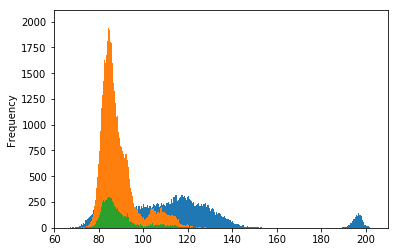

In [62]:
y_train.loc[X_train['cluster'] == 0].plot(kind='hist', bins=1000)
y_train.loc[X_train['cluster'] == 1].plot(kind='hist', bins=1000)
y_train.loc[X_train['cluster'] == 2].plot(kind='hist', bins=1000)

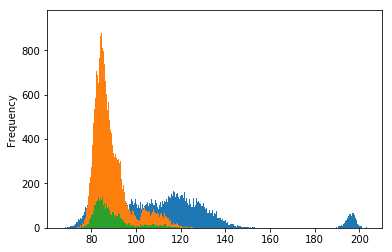

In [63]:
y_valid.loc[X_valid['cluster'] == 0].plot(kind='hist', bins=1000)
y_valid.loc[X_valid['cluster'] == 1].plot(kind='hist', bins=1000)
y_valid.loc[X_valid['cluster'] == 2].plot(kind='hist', bins=1000)

# Classifier

In [6]:
jhc_train.loc[jhc_train['scalar_coupling_constant'] > 170, 'high'] = True
jhc_train.loc[jhc_train['scalar_coupling_constant'] <= 170, 'high'] = False

In [7]:
N_FOLDS = 3
X = jhc_train[FEATURES]
y = jhc_train['high']
X = X.dropna(axis=1)
folds = GroupKFold(n_splits=N_FOLDS)
for fold_n, (train_idx, valid_idx) in enumerate(folds.split(X, groups=mol_group)):
    pass
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knclf = KNeighborsClassifier(n_neighbors=5)

In [10]:
knclf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
X_train['neighbor_classified'] = knclf.predict(X_train)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
print('test')

test


In [13]:
X_valid['neighbor_classified'] = knclf.predict(X_valid)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_train, X_train['neighbor_classified'])

0.9999978855847627

In [18]:
accuracy_score(y_valid, X_valid['neighbor_classified'])

1.0

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
